In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import pickle, os, gzip, json, sys, itertools
import seaborn

In [3]:
df = pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/summarize_benchmark.csv",header=None,sep='\t')

In [15]:
target_method = ['HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv','SimHash_Hamming_None_IDF_benchmark.csv','Exact_Cosine_None_IDF_benchmark.csv','MinHash_Jaccard_None_IDF_benchmark.csv','Minimap2_benchmark.csv']
region = ['./human/chr22','./human/HLA','./human/IGK']
df[(df.samples=="./human/chr22")&(df.sequence_type == "ONT_R9")&(df.method.isin(target_method))]

,samples,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
2698,./human/chr22,ONT_R9,HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv,453.5769,0:07:33,171102.84,172003.50,171100.96,171101.34,0.00,0.00,96.30,437.18
2700,./human/chr22,ONT_R9,MinHash_Jaccard_None_IDF_benchmark.csv,5041.8635,1:24:01,106156.61,112955.48,105664.03,105767.79,1840.88,0.00,96.81,4881.67
2702,./human/chr22,ONT_R9,SimHash_Hamming_None_IDF_benchmark.csv,10076.3316,2:47:56,519811.87,573439.46,519936.49,519944.86,19.40,21.35,98.79,9954.73
2703,./human/chr22,ONT_R9,Minimap2_benchmark.csv,1045.4748,0:17:25,41819.03,42585.81,41807.60,41811.76,4950.61,0.00,90.92,950.94
2704,./human/chr22,ONT_R9,Exact_Cosine_None_IDF_benchmark.csv,4548.3460,1:15:48,26790.28,27641.07,26766.62,26767.02,0.15,21.35,99.93,4545.38


In [5]:
header = ['samples','sequence_type','method','s','h:m:s','max_rss','max_vms','max_uss','max_pss','io_in','io_out','mean_load','cpu_time']
df.columns = header

In [ ]:
preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre+'_benchmark.csv')
    target_method.append('Exact_Euclidean_None_'+pre)
target_df = df[df.method.isin(target_method)]
target_df[['method', 'preprocess']] = target_df['method'].str.rsplit('_', n=1, expand=True)
metrics = ['precision','recall','continuity']
colors = sns.color_palette(palette='muted')
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i in range(0,3):
    sns.boxplot(x = 'preprocess',ax=axes[i],y =metrics[i], data = target_df,color=colors[i]) 
plt.legend(loc = (0.1,0.15),frameon=False)

In [16]:
df

,sample,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Euclidean_None_IDF_benchmark.csv,33.2741,0:00:33,1968.23,2732.27,1750.25,1796.26,95.60,0.0,44.08,15.08
1,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_None_benchmark.csv,26.8095,0:00:26,2651.79,3416.25,2433.72,2479.81,0.00,0.0,56.25,15.47
2,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_TF_benchmark.csv,26.1791,0:00:26,2763.57,4487.15,2546.13,2648.01,0.00,0.0,57.83,15.54
3,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_IDF_benchmark.csv,27.2086,0:00:27,2321.82,3090.45,2114.90,2183.25,0.03,0.0,55.61,15.50
4,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Euclidean_None_TF_benchmark.csv,23.4956,0:00:23,2532.71,4137.18,2319.57,2390.43,0.00,0.0,64.32,15.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,./TAIR/chr3,pbsim_ONT_93_30k,Exact_Euclidean_None_None_benchmark.csv,115.2627,0:01:55,8107.05,9054.74,7879.53,7934.94,0.00,0.0,91.00,105.28
2671,./TAIR/chr3,pbsim_ONT_93_30k,NNDescent_Cosine_GaussianRP_500d_IDF_benchmark...,208.7314,0:03:28,57572.39,58400.50,57351.42,57419.30,0.26,0.0,99.54,208.17
2672,./TAIR/chr3,pbsim_ONT_93_30k,Exact_Euclidean_None_TF-IDF_benchmark.csv,129.0304,0:02:09,7221.77,8149.42,6991.69,7029.49,0.51,0.0,80.86,104.77
2673,./TAIR/chr3,pbsim_ONT_93_30k,Exact_Cosine_None_TF-IDF_benchmark.csv,124.9650,0:02:04,8053.47,9063.27,7829.82,7883.94,0.00,0.0,84.08,105.41


<BarContainer object of 8 artists>

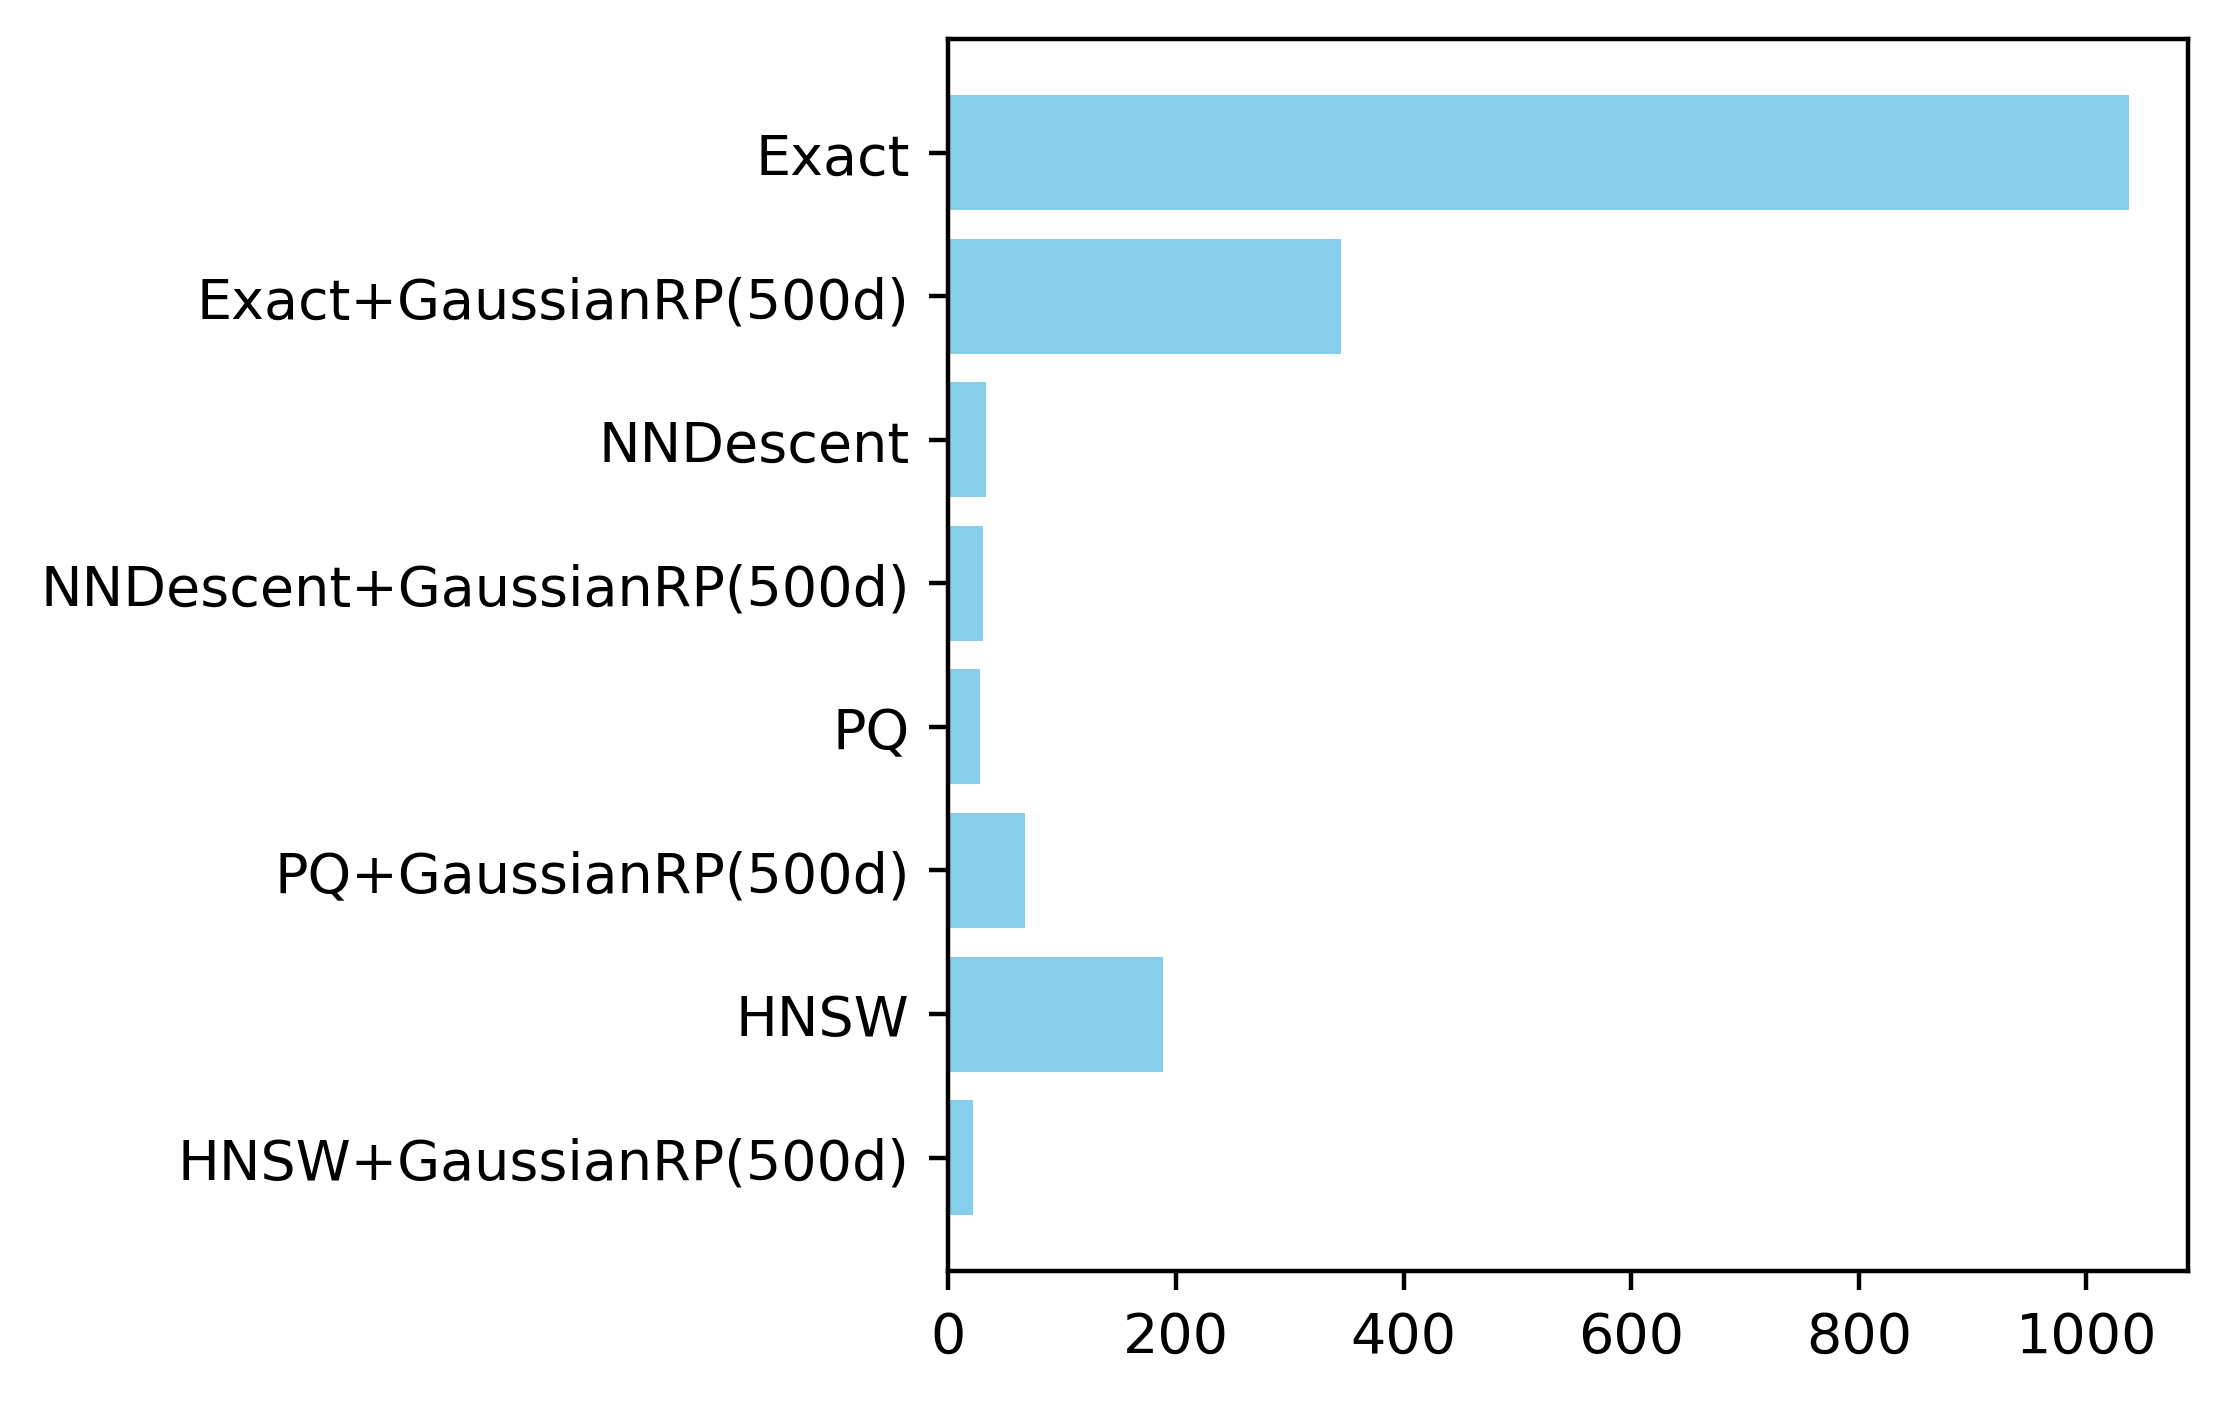

In [55]:
plt.rcParams['figure.dpi'] = 400
demethods = ['HNSW','PQ','NNDescent','Exact']
target_method = []
target_method_in_pic = []
for i,demethod in enumerate(demethods):
    target_method.append(demethod+'_Cosine_GaussianRP_500d_IDF_benchmark.csv')
    target_method_in_pic.append(demethod+'+GaussianRP(500d)')
    target_method.append(demethod+'_Cosine_None_IDF_benchmark.csv')
    target_method_in_pic.append(demethod)
target_df = df[(df.sequence_type=='pbsim_ONT_93_30k')&(df.method.isin(target_method))&(df.samples=='./CHM13/IGK')]
plt.figure(figsize=(4, 4))  # 宽度为 8 英寸，高度为 6 英寸
plt.barh(target_method_in_pic, target_df['s'], color='skyblue')

<BarContainer object of 8 artists>

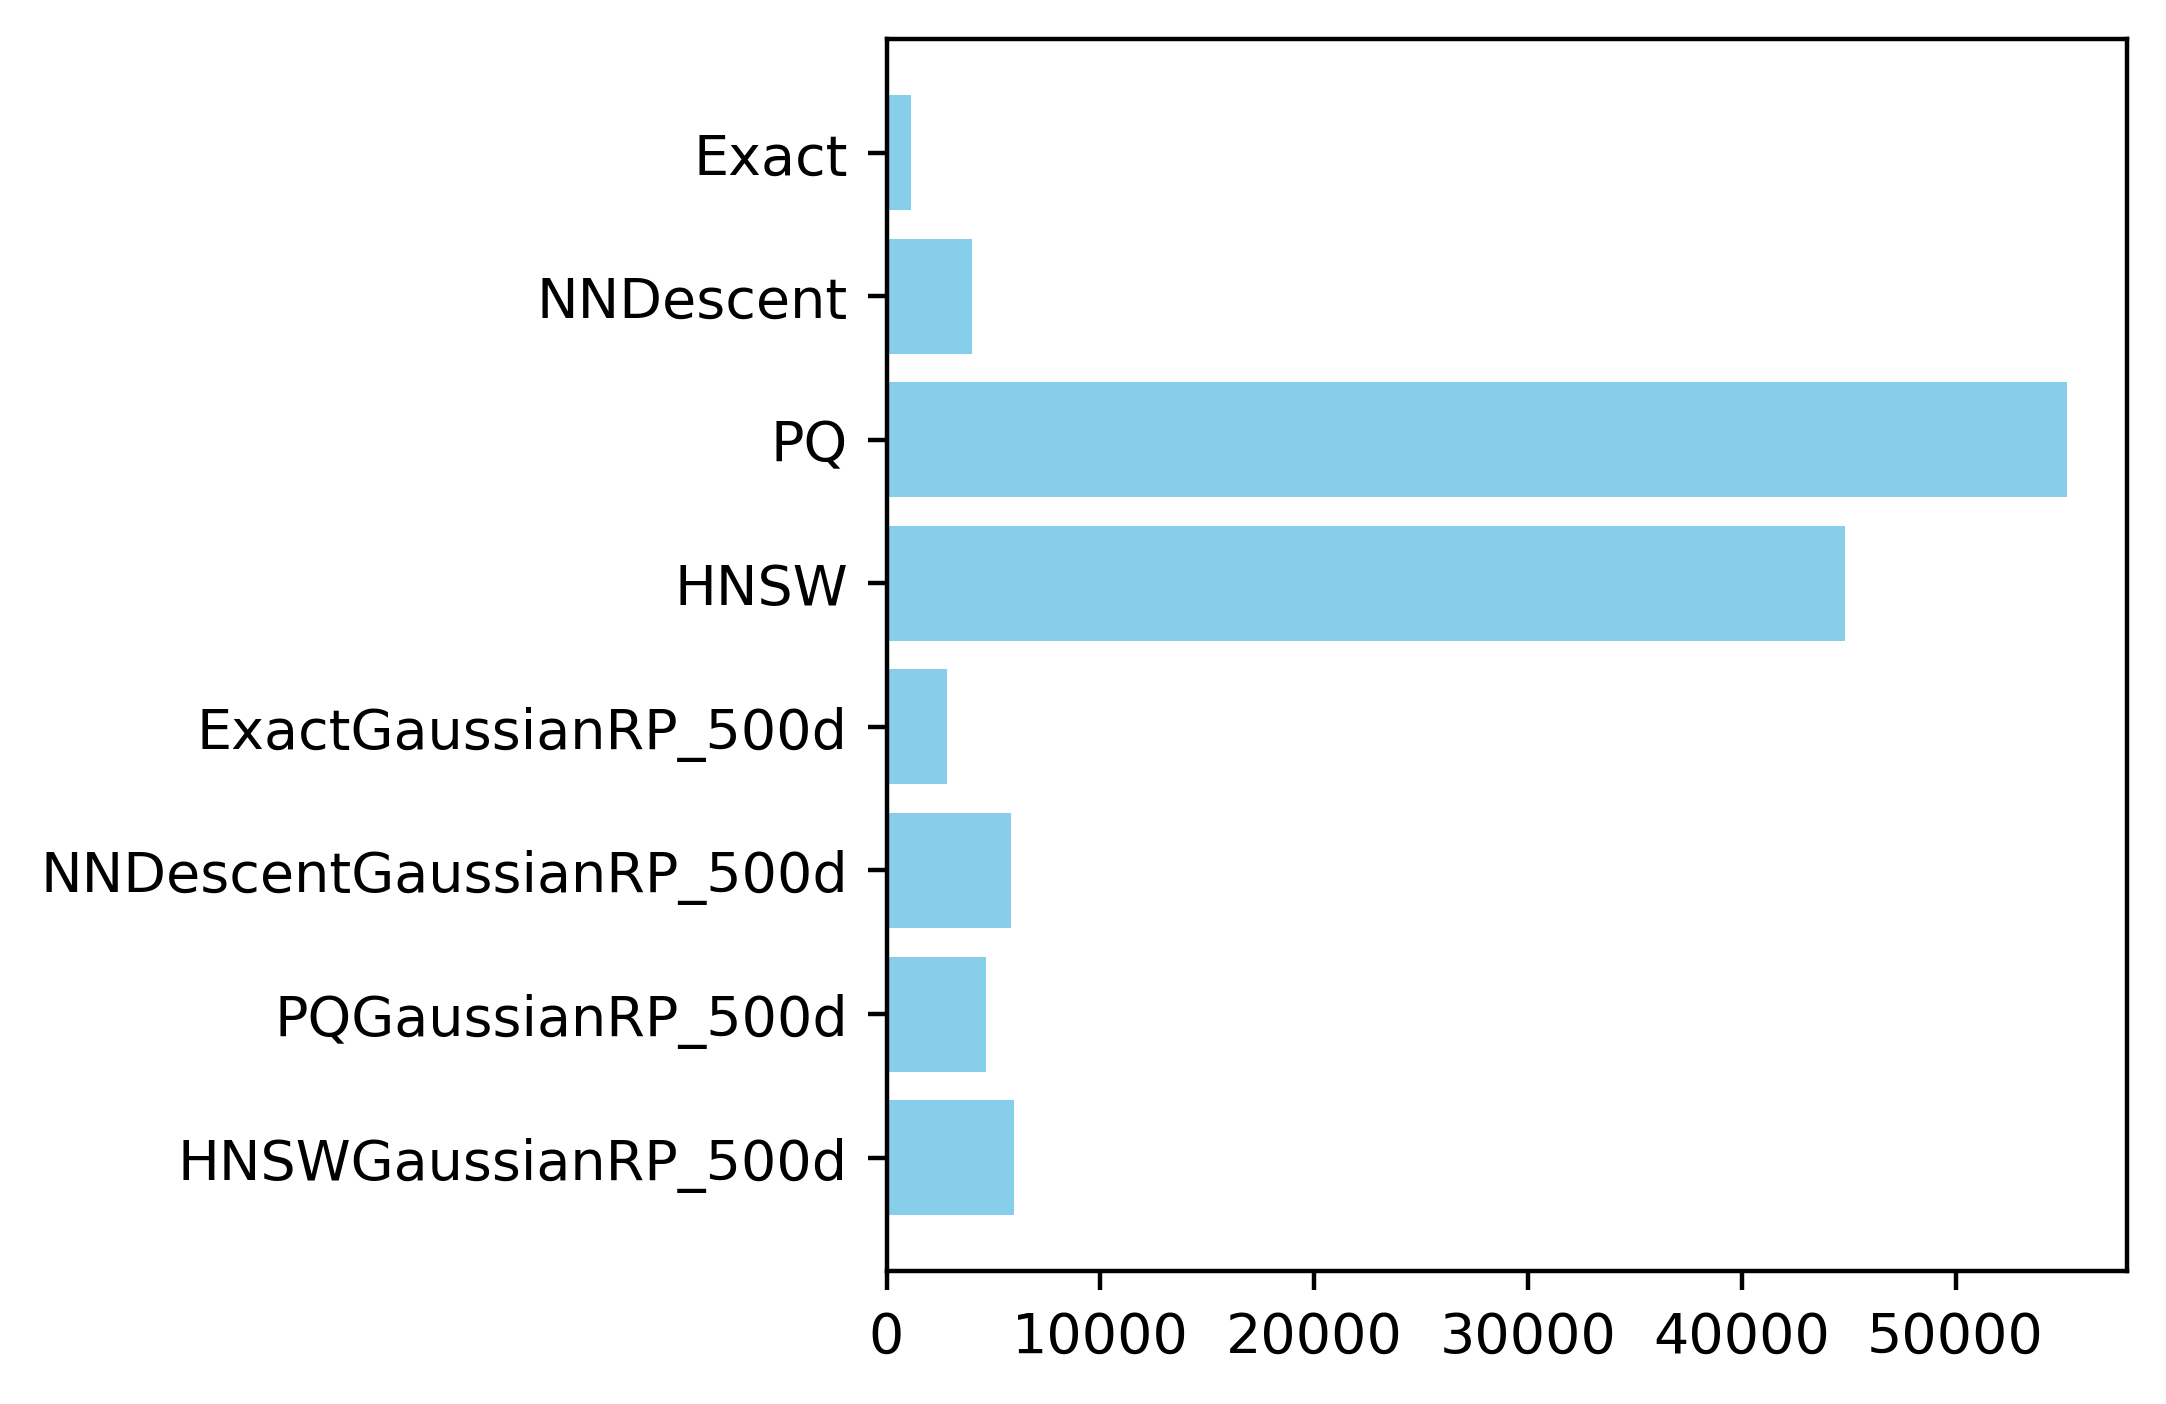

In [74]:
plt.rcParams['figure.dpi'] = 400
demethods = ['HNSW','PQ','NNDescent','Exact']
target_method = []
target_method_in_pic = []
s = []
max_rss = []
for i,demethod in enumerate(demethods):
    method1 = demethod+'_Cosine_GaussianRP_500d_IDF_benchmark.csv'
    target_method.append(method1)
    target_method_in_pic.append(demethod+'GaussianRP_500d')
    s += df[(df.method==method1)&(df.sequence_type=='pbsim_ONT_93_30k')&(df.samples=='./CHM13/IGK')].loc[:,'s'].tolist()
    max_rss += df[(df.method==method1)&(df.sequence_type=='pbsim_ONT_93_30k')&(df.samples=='./CHM13/IGK')].loc[:,'max_rss'].tolist()
for i,demethod in enumerate(demethods):
    method1 = demethod+'_Cosine_None_IDF_benchmark.csv'
    target_method.append(method1)
    target_method_in_pic.append(demethod)
    s += df[(df.method==method1)&(df.sequence_type=='pbsim_ONT_93_30k')&(df.samples=='./CHM13/IGK')].loc[:,'s'].tolist()
    max_rss += df[(df.method==method1)&(df.sequence_type=='pbsim_ONT_93_30k')&(df.samples=='./CHM13/IGK')].loc[:,'max_rss'].tolist()

plt.figure(figsize=(4, 4))  # 宽度为 8 英寸，高度为 6 英寸
plt.barh(target_method_in_pic,max_rss, color='skyblue')

In [57]:
target_df

,samples,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
2038,./CHM13/IGK,pbsim_ONT_93_30k,HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv,21.7707,0:00:21,5942.21,6131.56,5865.50,5885.37,0.00,0.00,69.36,15.51
2048,./CHM13/IGK,pbsim_ONT_93_30k,NNDescent_Cosine_None_IDF_benchmark.csv,188.9489,0:03:08,4014.04,11507.98,3993.77,4002.81,5.21,0.00,3916.30,7399.98
2113,./CHM13/IGK,pbsim_ONT_93_30k,PQ_Cosine_GaussianRP_500d_IDF_benchmark.csv,67.3202,0:01:07,4669.57,6980.77,4424.03,4480.66,0.00,0.00,67.00,45.50
2133,./CHM13/IGK,pbsim_ONT_93_30k,Exact_Cosine_GaussianRP_500d_IDF_benchmark.csv,27.8982,0:00:27,2833.75,4457.80,2608.46,2666.07,0.00,0.00,53.91,15.45
2146,./CHM13/IGK,pbsim_ONT_93_30k,Exact_Cosine_None_IDF_benchmark.csv,30.5003,0:00:30,1138.13,19916.38,1098.41,1114.53,0.00,0.02,47.47,27.64
2168,./CHM13/IGK,pbsim_ONT_93_30k,NNDescent_Cosine_GaussianRP_500d_IDF_benchmark...,32.9251,0:00:32,5807.41,6977.77,5552.42,5625.48,0.00,0.00,45.40,15.36
2178,./CHM13/IGK,pbsim_ONT_93_30k,HNSW_Cosine_None_IDF_benchmark.csv,345.2335,0:05:45,44839.46,62610.48,44817.97,44826.95,0.02,0.00,4803.06,16582.41
2192,./CHM13/IGK,pbsim_ONT_93_30k,PQ_Cosine_None_IDF_benchmark.csv,1037.6828,0:17:17,55232.42,65851.03,55016.35,55115.27,55.82,0.00,97.27,1009.63


In [34]:
demethods = ['HNSW','NNDescent']
target_method = []
target_method_in_pic = []
for i,demethod in enumerate(demethods):
    target_method.append(demethod+'_Cosine_GaussianRP_500d_IDF_benchmark.csv')
    target_method_in_pic.append(demethod+'(Cosine)+GaussianRP(500d)+IDF')
df[(df.sequence_type=='pbsim_ONT_93_30k')&(df.method.str.contains('None_IDF_benchmark.csv'))&(df.samples=='./CHM13/IGK')].sort_values(by='method')

,samples,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
2146,./CHM13/IGK,pbsim_ONT_93_30k,Exact_Cosine_None_IDF_benchmark.csv,30.5003,0:00:30,1138.13,19916.38,1098.41,1114.53,0.00,0.02,47.47,27.64
2055,./CHM13/IGK,pbsim_ONT_93_30k,Exact_Euclidean_None_IDF_benchmark.csv,33.0330,0:00:33,1138.64,19988.39,1083.54,1107.39,95.78,22.91,45.30,62.40
2178,./CHM13/IGK,pbsim_ONT_93_30k,HNSW_Cosine_None_IDF_benchmark.csv,345.2335,0:05:45,44839.46,62610.48,44817.97,44826.95,0.02,0.00,4803.06,16582.41
2056,./CHM13/IGK,pbsim_ONT_93_30k,HNSW_Euclidean_None_IDF_benchmark.csv,255.8175,0:04:15,44519.00,62290.12,44304.99,44406.87,0.00,0.00,6325.01,16181.01
2087,./CHM13/IGK,pbsim_ONT_93_30k,MinHash_Jaccard_None_IDF_benchmark.csv,159.9045,0:02:39,4104.21,5054.51,3880.41,3965.50,0.65,0.00,84.11,134.79
2048,./CHM13/IGK,pbsim_ONT_93_30k,NNDescent_Cosine_None_IDF_benchmark.csv,188.9489,0:03:08,4014.04,11507.98,3993.77,4002.81,5.21,0.00,3916.30,7399.98
2096,./CHM13/IGK,pbsim_ONT_93_30k,NNDescent_Euclidean_None_IDF_benchmark.csv,185.2805,0:03:05,3924.91,11504.70,3909.80,3918.74,0.03,0.00,4751.17,8803.39
2192,./CHM13/IGK,pbsim_ONT_93_30k,PQ_Cosine_None_IDF_benchmark.csv,1037.6828,0:17:17,55232.42,65851.03,55016.35,55115.27,55.82,0.00,97.27,1009.63
2198,./CHM13/IGK,pbsim_ONT_93_30k,PQ_Euclidean_None_IDF_benchmark.csv,987.7132,0:16:27,41934.30,53070.73,41810.32,41867.66,0.00,0.00,98.67,974.94
2123,./CHM13/IGK,pbsim_ONT_93_30k,SimHash_Hamming_None_IDF_benchmark.csv,127.7581,0:02:07,19282.33,20098.80,19062.49,19147.58,56.72,0.00,80.96,103.73


In [77]:
demethods = ['HNSW','NNDescent']
target_method = ['HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv','HNSW_Cosine_SparseRP_500d_IDF_benchmark.csv']
target_method_in_pic = []
df[(df.sequence_type=='pbsim_ONT_93_30k')&(df.method.isin(target_method))].sort_values(by='samples')

,samples,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
276,./CHM13/HLA,pbsim_ONT_93_30k,HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv,38.9867,0:00:38,4237.54,6299.99,4154.28,4174.09,0.00,0.00,38.81,15.49
293,./CHM13/HLA,pbsim_ONT_93_30k,HNSW_Cosine_SparseRP_500d_IDF_benchmark.csv,12.0640,0:00:12,1643.35,10582.57,1590.43,1609.93,0.00,1.14,176.62,21.63
2038,./CHM13/IGK,pbsim_ONT_93_30k,HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv,21.7707,0:00:21,5942.21,6131.56,5865.50,5885.37,0.00,0.00,69.36,15.51
2082,./CHM13/IGK,pbsim_ONT_93_30k,HNSW_Cosine_SparseRP_500d_IDF_benchmark.csv,8.3847,0:00:08,1157.05,9241.15,1081.24,1105.52,55.70,0.78,162.18,13.98
2649,./TAIR/chr3,pbsim_ONT_93_30k,HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv,375.1043,0:06:15,57533.02,58399.51,57313.33,57359.61,167.62,0.00,91.03,341.91
2653,./TAIR/chr3,pbsim_ONT_93_30k,HNSW_Cosine_SparseRP_500d_IDF_benchmark.csv,41.7531,0:00:41,2507.71,3275.30,2290.39,2336.56,293.48,0.00,34.25,14.76
2484,./yeast/chr10,pbsim_ONT_93_30k,HNSW_Cosine_GaussianRP_500d_IDF_benchmark.csv,12.3782,0:00:12,3093.60,8862.35,3016.96,3043.22,0.00,0.31,105.52,13.38
2496,./yeast/chr10,pbsim_ONT_93_30k,HNSW_Cosine_SparseRP_500d_IDF_benchmark.csv,6.4708,0:00:06,590.74,8694.46,514.89,540.23,0.00,0.31,113.71,7.66


In [26]:
df

,samples,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Euclidean_None_IDF_benchmark.csv,33.2741,0:00:33,1968.23,2732.27,1750.25,1796.26,95.60,0.0,44.08,15.08
1,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_None_benchmark.csv,26.8095,0:00:26,2651.79,3416.25,2433.72,2479.81,0.00,0.0,56.25,15.47
2,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_TF_benchmark.csv,26.1791,0:00:26,2763.57,4487.15,2546.13,2648.01,0.00,0.0,57.83,15.54
3,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_IDF_benchmark.csv,27.2086,0:00:27,2321.82,3090.45,2114.90,2183.25,0.03,0.0,55.61,15.50
4,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Euclidean_None_TF_benchmark.csv,23.4956,0:00:23,2532.71,4137.18,2319.57,2390.43,0.00,0.0,64.32,15.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,./TAIR/chr3,pbsim_ONT_93_30k,Exact_Euclidean_None_None_benchmark.csv,115.2627,0:01:55,8107.05,9054.74,7879.53,7934.94,0.00,0.0,91.00,105.28
2671,./TAIR/chr3,pbsim_ONT_93_30k,NNDescent_Cosine_GaussianRP_500d_IDF_benchmark...,208.7314,0:03:28,57572.39,58400.50,57351.42,57419.30,0.26,0.0,99.54,208.17
2672,./TAIR/chr3,pbsim_ONT_93_30k,Exact_Euclidean_None_TF-IDF_benchmark.csv,129.0304,0:02:09,7221.77,8149.42,6991.69,7029.49,0.51,0.0,80.86,104.77
2673,./TAIR/chr3,pbsim_ONT_93_30k,Exact_Cosine_None_TF-IDF_benchmark.csv,124.9650,0:02:04,8053.47,9063.27,7829.82,7883.94,0.00,0.0,84.08,105.41


In [25]:
df[df.samples=='./CHM13/HLA']

,samples,sequence_type,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Euclidean_None_IDF_benchmark.csv,33.2741,0:00:33,1968.23,2732.27,1750.25,1796.26,95.60,0.00,44.08,15.08
1,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_None_benchmark.csv,26.8095,0:00:26,2651.79,3416.25,2433.72,2479.81,0.00,0.00,56.25,15.47
2,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_TF_benchmark.csv,26.1791,0:00:26,2763.57,4487.15,2546.13,2648.01,0.00,0.00,57.83,15.54
3,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Cosine_None_IDF_benchmark.csv,27.2086,0:00:27,2321.82,3090.45,2114.90,2183.25,0.03,0.00,55.61,15.50
4,./CHM13/HLA,pbsim_ONT_93_20k,Exact_Euclidean_None_TF_benchmark.csv,23.4956,0:00:23,2532.71,4137.18,2319.57,2390.43,0.00,0.00,64.32,15.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,./CHM13/HLA,pbsim_ONT_93_30k,Exact_Cosine_None_TF-IDF_benchmark.csv,43.2022,0:00:43,1252.68,20100.24,1213.29,1229.31,95.78,18.46,32.57,54.92
356,./CHM13/HLA,pbsim_ONT_93_30k,Exact_Euclidean_GaussianRP_500d_IDF_benchmark.csv,41.7771,0:00:41,2997.53,7144.68,2769.68,2811.19,0.00,0.00,36.05,15.46
357,./CHM13/HLA,pbsim_ONT_93_30k,Exact_Cosine_scBiMap_500d_TF-IDF_benchmark.csv,379.5083,0:06:19,16445.92,17268.71,16229.62,16285.78,0.00,0.00,99.08,376.42
358,./CHM13/HLA,pbsim_ONT_93_30k,Exact_Euclidean_SparseRP_500d_TF_benchmark.csv,49.7196,0:00:49,2032.90,2857.85,1808.54,1866.02,0.00,0.00,90.71,45.51


In [ ]:
dims = ['Spectural_500d','GaussianRP_500d','SparseRP_500d','umap_500d','PCA_500d','scBiMap_500d']
dims_in_pic = ['Spectral(500d)','GaussianRP(500d)','SparseRP(500d)','UMAP(500d)','PCA(500d)','scBiMapping(500d)']
target_method = []
target_method_in_pic = []
for i,dim in enumerate(dims):
    target_method.append('HNSW_Cosine_'+dim+'_IDF')
    target_method_in_pic.append('HNSW(Cosine)+'+dims_in_pic[i]+'+IDF')
target_df = df[(df.sequence_type=='pbsim_ONT_93_30k')&(df.method.isin(target_method))&(df.n_neighbors==6)].sort_values(by=['sample','method'])